## Fourier Series and Fourier Transforms

### Paul Anzel DATEDATEDATE

This is a fundamental techique in a lot of numerical analysis and engineering. The basic idea is this--we have some signal (perhaps some signal in time) and we want to understand what's going on. You could just draw the signal:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
import seaborn as sns
np.set_printoptions(suppress=True, precision=3)
sns.set_style('white')

/Users/anzelp/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
### Function to generate my sales data
### Pretend you didn't see this
np.random.seed(314159)
days_array = np.arange(364, dtype=float)
weekly_premium = np.tile([1.1, .95, .95, .9, 1, 1.05, 1.1], 52) # SuMTWRFSa
sales_array = 25*np.ones(364) # Baseline
sales_array = sales_array + 3*np.cos((2*np.pi*days_array/364)+0.3) # A seasonal variation
sales_array = sales_array*weekly_premium # Weekly variation
sales_array = sales_array + 1.5*np.random.randn(364) # Some random noise
sales_array[320] = sales_array[320]*2 # 'Cyber Monday'
sales_array[330:350] = 1.5*sales_array[330:350] # 'Christmas season'
sales_array = np.around(sales_array) # Only integer numbers of sales

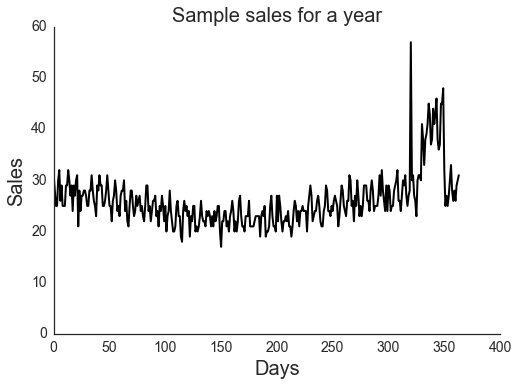

In [3]:
plt.plot(days_array, sales_array, color='k', linewidth=2)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('Sample sales for a year', fontsize=20)
plt.axis([0, 400, 0, 60])
plt.tick_params(labelsize=14)
sns.despine()

But one way to gain some insight into the data is to look at the sorts of frequencies you can see in the data--for example, in a year's worth of data, is the weekly-rise and fall very prominent? Or when Victor Wooten plucks a string, what frequencies you do hear?

In [4]:
# Some nice overtones starting 2:14
from IPython.display import YouTubeVideo, Image
YouTubeVideo('nt0C9DZT0qo')

The Fourier series is a way to decompose a signal into a bunch of sine and cosine waves, based on three principles:

- For some continuous function $f(t)$ between 0 and $T$, $\lim_{n \rightarrow \infty} a_0 + \sum_{k = 1}^n a_k \cos (2\pi k t/T) + b_k \sin (2\pi k t/T) = f(t)$. If $f(t)$ is piece-wise continuous, it'll limit to the function and then interpolate between the breaks (with ringing at finite $n$, called the [Gibbs phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon)).

- $\int_0^T \sin(2\pi m t/T) \sin(2\pi n t/T) dt = 0 \text{ if } m \neq n$ ($m$ and $n$ are integers). Similarly $\int_0^T \cos(2\pi m t/T) \cos(2\pi n t/T) dt = 0 \text{ if } m \neq n$. And you get zeros when combining sines and cosines.

- $\int_0^T \sin(2\pi m t/T)^2 dt = T/2$

So basically, you take the integrals $(2/T)\int_0^T f(t) \sin(2\pi m t/T) dt$ and $(2/T)\int_0^T f(t) \sin(2\pi m t/T) dt$, and you'll get $a_m$ and $b_m$ respectively.

For an example, let's talk about a square wave.

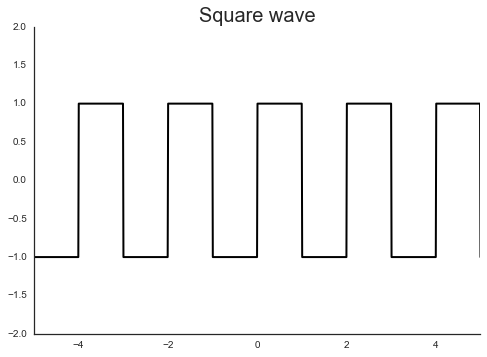

In [5]:
x_square = np.linspace(-5, 5, num=1000)
y_square = np.power(-1, np.floor(x_square))
plt.plot(x_square, y_square, color='k', linewidth=2)
plt.axis((-5, 5, -2, 2))
plt.title('Square wave', fontsize=20)
sns.despine()

You can tell it sounds different from just a simple wave.

In [6]:
YouTubeVideo('uIuJTWS2uvY', start=60)

But to figure out how it sounds different, let's look at the Fourier coefficients. For simplicity, let's look at between -1 and 1 in the example above (since this is periodic, we can shift our window around as we like, we'll just change how things are distributed between the sines and cosines).

$f(t) = -1 \text{ when }-1<t\leq0, 1 \text{ when }0<t\leq1$

Because this function is odd, all the cosine terms will be zero.

As for the $b_k$ sine terms:

$$ b_k = \frac{2}{2}\int_{-1}^{1}\text{Square}(t) \sin(2\pi k t/2) dt$$
$$ b_k = -\int_{-1}^{0} \sin(\pi k t) dt + \int_{0}^{1} \sin(\pi k t) dt$$
$$ b_k = -\left[ \frac{\cos(\pi k t)}{\pi k} \right]_{0}^{-1} + -\left[ \frac{\cos(\pi k t)}{\pi k} \right]_{0}^{1}$$
$$ b_k = \frac{1}{\pi k} \left(2 -  2 \cos(\pi k)\right)$$

If $k$ is even, this becomes $2 - 2 = 0$. If $k$ is odd, this becomes $4/\pi k$. As a Fourier series, our square wave is written as

$$ \text{Square}(t) = \frac{4}{\pi} \left( \frac{1}{1} \sin (\pi t) + \frac{1}{3} \sin (3 \pi t) + \frac{1}{5} \sin (5 \pi t) + \frac{1}{7} \sin (7 \pi t) + \cdots \right)$$

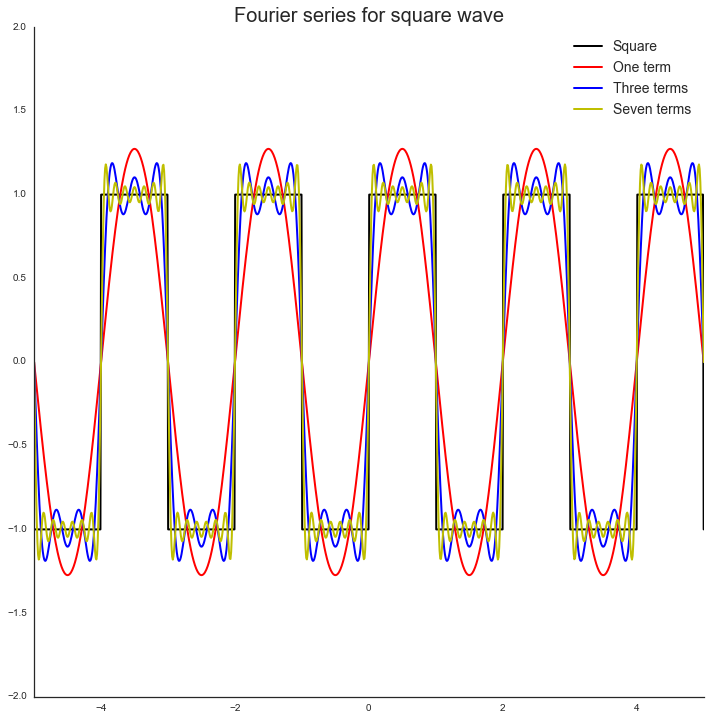

In [7]:
one_sine = (4/np.pi)*(np.sin(np.pi*x_square))
three_sines = (4/np.pi)*(np.sin(np.pi*x_square)
                          + (1.0/3)*np.sin(3*np.pi*x_square)
                          + (1.0/5)*np.sin(5*np.pi*x_square))
seven_sines = (4/np.pi)*(np.sin(np.pi*x_square)
                          + (1.0/3)*np.sin(3*np.pi*x_square)
                          + (1.0/5)*np.sin(5*np.pi*x_square)
                          + (1.0/7)*np.sin(7*np.pi*x_square)
                          + (1.0/9)*np.sin(9*np.pi*x_square)
                          + (1.0/11)*np.sin(11*np.pi*x_square)
                          + (1.0/13)*np.sin(13*np.pi*x_square))

plt.figure(figsize=(12,12))
plt.plot(x_square, y_square, color='k', linewidth=2, label='Square')
plt.plot(x_square, one_sine, color='r', linewidth=2, label='One term')
plt.plot(x_square, three_sines, color='b', linewidth=2, label='Three terms')
plt.plot(x_square, seven_sines, color='y', linewidth=2, label='Seven terms')
plt.axis((-5, 5, -2, 2))
plt.legend(fontsize=14)
plt.title('Fourier series for square wave', fontsize=20)
sns.despine()

So, if we had a square-wave at C4 (middle-C) we'd also be hearing the notes G5, E6, B$\flat$6, D7,... while the sine wave is only C4.

Generally you won't care about the exact values of $a_k$ and $b_k$ but their combinations for a given $k$. We'll talk about the amplitude $A_k = \sqrt{a_k^2 + b_k^2}$ and the phase $\phi_k = \text{atan2}(a_k, b_k)$.$^*$

Often to do both computations at once, people will use $e^{i 2\pi k t/T} = \cos(2\pi k t/T) + i\sin(2\pi k t/T)$, and so the real part of the coefficients is the cosine part and the imaginary part of the coefficents is the sine part. This also makes the whole amplitude and phase part more clear.

$^*$ $\text{atan2}(x, y)$ is basically the $\arctan(x/y)$ function, but deals with cases where $y$ could be zero intelligently. Use numpy.arctan2 or math.atan2.

It's easier to understand the importance of amplitudes (tells you what's there) but phase is important for telling you when things happen, so if you're filtering data you should always be aware of what's happening to the phase. Going to the example below shows what happens if you lose amplitude and phase information, respectively, for a picture.

http://www.comm.utoronto.ca/~dkundur/course_info/signals/notes/Kundur_FourierMagPhase.pdf

Realistically, most data you have is not going to have some easy calculation you can do like above, and you're going to do some sort of numerical integration. In Python you could use something like ``scipy.integrate.cumtrapz``, but there's a much better algorithm below.

### Fourier Transform

For the Fourier series, we see frequencies at $\nu = 0, \frac{1}{T}, \frac{2}{T}, \frac{3}{T}, \cdots$. If we let our range $T$ expand and expand, the frequencies get closer and closer together, and if we let $T$ grow indefinitely in both directions, we could consider freqencies as getting indefinitely close together and becoming continuous. This is the basic idea of the Fourier Transform, which looks at a function from $-\infty$ to $\infty$.

(You can also have it go in multiple directions as well, but that's a pretty straightforward extension.)

There are [multiple definition](http://www.johndcook.com/blog/fourier-theorems/) of the Fourier Transform that are related (which is a hassle to keep straight) but let's define the Fourier transform as

$$ \mathcal{F}(f)(\nu) = \int_{-\infty}^{\infty} f(t) e^{-i 2 \pi \nu t} dt $$

As usual, [Wikipedia](https://en.wikipedia.org/wiki/Fourier_transform#Tables_of_important_Fourier_transforms) has some nice tables of functions and their related transforms.

We're going to do some computational data processing with Fourier transforms in a bit, but here's some useful things to know:
- The Fourier transform of a Fourier transform recovers the initial function, but with $-x$ (and sometimes up to a scaling factor). So we often talk about Fourier transform pairs. Related, the inverse Fourier Transform is given by

$$ \mathcal{F}^{-1}(F)(t) = \int_{-\infty}^{\infty} F(\nu) e^{i 2 \pi \nu t} d\nu $$

- $\mathcal{F}(f(t) \times g(t)) = \mathcal{F}(f(t))*\mathcal{F}(g(t))$ and $\mathcal{F}^{-1}(F(\nu) \times G(\nu)) = \mathcal{F}^{-1}(F(\nu)) * \mathcal{F}^{-1}(F(\nu))$ where $*$ is a procedure called convolution. This is used a lot when trying to clean up noisy time-series data--you'll want to try and filter the noisy part away, which means numerically convolving (basically taking a weighted moving average) the inverse FT of the filter with your data.

$$ (f*g)(t) = \int_{-\infty}^{\infty}f(\tau)g(t-\tau)d\tau$$

- Things that are wide in real space/time are narrow in Fourier space, and vice-versa. $\mathcal{F}(f(at)) = \frac{1}{|a|}F(\frac{\nu} {a})$

### Discrete Fourier Transform and the FFT

In reality, the data you get is usually going to be a series of discrete points and over a limited period of time. So we're going to pretend like the data is either periodic (like a Fourier series) and the integrals turn into sums.

$$ \mathcal{F}(f)(\nu) = \int_0^T f(t) e^{-i 2 \pi \nu t} dt \Rightarrow \sum_{t_k} f(t_k) e^{-i 2 \pi \nu t_k}$$

However, there's a vital algorithm called the Fast Fourier Transform that does this quickly (computer time from $O(N^2)$ to $O(N \log N$). However, you only get benefits if your data array is a highly composite number--computing time goes like the sum of the prime factors. So if your data is an array of length 263 (which is prime) it'll be over 10 times slower than an array of length 264 ($264 = 2 \times 2 \times 2 \times 3 \times 11$, so compute time is like $2 + 2 + 2 + 3 + 11 = 20$).

Often times, people will pad the signal with zeros to the next power of two or will (alternately) truncate the data.

### Nyquist-Shannon Sampling Theorem and Resolution

When we're trying to collect data, we have two questions:

- How often should we measure?

- How long should we measure?

Or, alternately, we're limited in one way or another for these two questions and we want to know the best we can do is work with these limits.

The first question is answered by the Nyquist-Shannon Sampling Theorem. This says that for sampling frequency $f_s$, the highest frequencies you can measure are $\nu < f_s/2$.

[(Proof by Wikipedia)](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem).

If you do have things happening at higher frequencies, these show up as lower frequency artefacts, a phenomenon known as [aliasing](https://en.wikipedia.org/wiki/Aliasing).

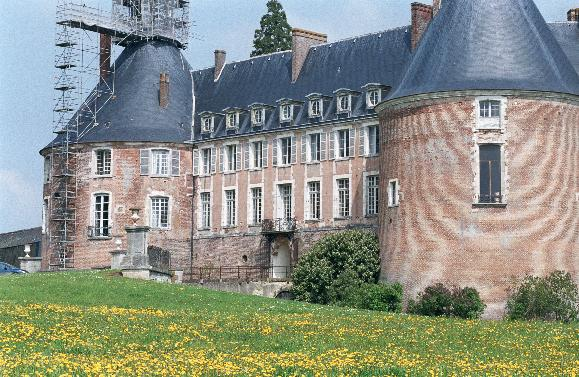

In [8]:
# Image from https://svi.nl/AntiAliasing
Image('Aliased_image.jpg')

On the other hand, if you've sampled for length (of time, of space...) $T$, then sampling resolution you get is $\Delta \nu = 1/T$. We could see this in our definition of the Fourier Series above, but a nice heuristic is that if you had two signals that are *almost* the same frequency, you'd have to look for a really long time to be able to see whether or not the two signals will change.

So, an example--let's say I was looking at stock data and I wanted to see how much things are changing hour to hour. I would then want to sample every 29 minutes (and probably some integer amount). If I wanted to clearly distinguish between a cycle that happens every month and that happens every 1.5 months (so $\Delta \nu = 0.5 \text{ months}^{-1}$) you're going to need at least 2 months worth of data.

There is a way to beat the Nyquist Theorem with something called Compressed Sampling, but this is something for another time.

### Okay, that's enough text, let's actually see the code...

Let's say we have a year's worth of sales data, and we wanted to know whether or not we should include weekly variation as part of our model.

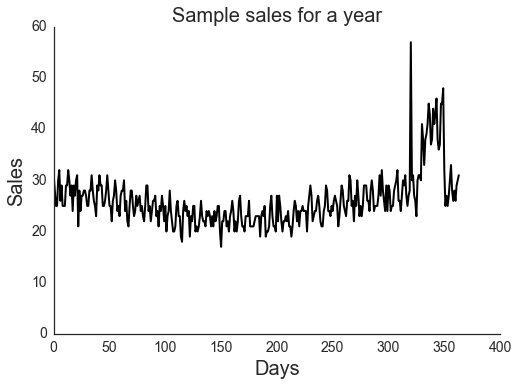

In [9]:
# Just to remind ourselves what we were looking at
plt.plot(days_array, sales_array, color='k', linewidth=2)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('Sample sales for a year', fontsize=20)
plt.axis([0, 400, 0, 60])
plt.tick_params(labelsize=14)
sns.despine()

In [10]:
from scipy.fftpack import fft, ifft

sales_fft = fft(sales_array)
# If we wanted to pad up or down, the input n=... lets us do this easily
print(len(sales_fft))
print(sales_fft[:3])

364
[ 9473.000  +0.j      782.247+293.336j   170.337+202.042j]


But what are the frequencies? Two options:

In [11]:
lenval = len(sales_array)
# Since we know the resolution is 1/T and len(sales_fft) = 364 we can intelligently 
freqs = np.arange(lenval)*(1/364.0)
# Or use the fftfreq function
from scipy.fftpack import fftfreq
freqs2 = fftfreq(lenval, d=1.0)  # d = 1 day
print(freqs[:10])
print(freqs2[:10])

[ 0.     0.003  0.005  0.008  0.011  0.014  0.016  0.019  0.022  0.025]
[ 0.     0.003  0.005  0.008  0.011  0.014  0.016  0.019  0.022  0.025]


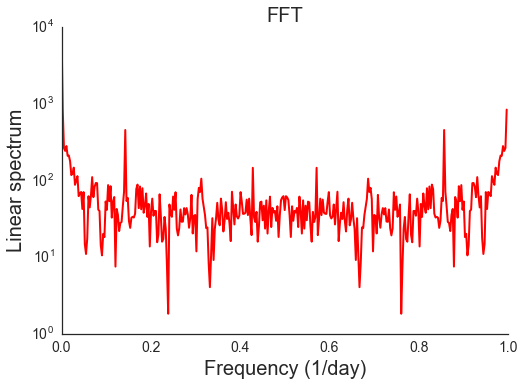

In [12]:
plt.figure()
plt.semilogy(freqs, np.abs(sales_fft), linewidth=2, color='r')
plt.ylabel('Linear spectrum', fontsize=20)
plt.xlabel('Frequency (1/day)', fontsize=20)
plt.title('FFT', fontsize=20)
plt.tick_params(labelsize=14)
sns.despine()

This is a bit weird, since we're seeing a mirror image and we're getting TWICE the Nyquist frequency. This happens due to the same periodicity issues behind aliasing, and either you'll either take the first half of the figure:

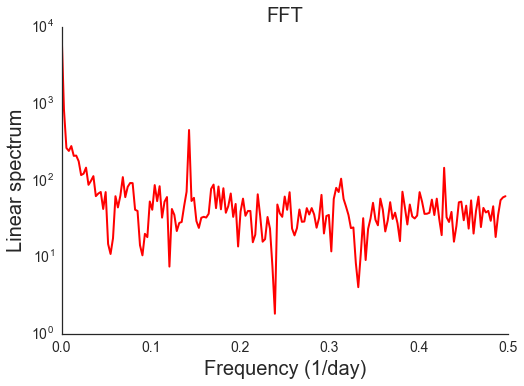

In [13]:
plt.figure()
plt.semilogy(freqs[:lenval/2], np.abs(sales_fft)[:lenval/2], linewidth=2, color='r')
plt.ylabel('Linear spectrum', fontsize=20)
plt.xlabel('Frequency (1/day)', fontsize=20)
plt.title('FFT', fontsize=20)
plt.tick_params(labelsize=14)
sns.despine()

Or you will use the ``fftshift`` function to shift the latter half to negative frequencies, which will give valid results. You'll want to combine this with the ``fftfreq`` function as well (gives the proper negative values).

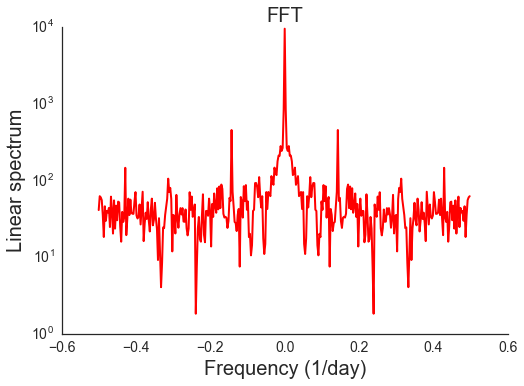

In [14]:
from scipy.fftpack import fftshift
plt.figure()
plt.semilogy(fftshift(freqs2), fftshift(np.abs(sales_fft)), linewidth=2, color='r')
plt.ylabel('Linear spectrum', fontsize=20)
plt.xlabel('Frequency (1/day)', fontsize=20)
plt.title('FFT', fontsize=20)
plt.tick_params(labelsize=14)
sns.despine()

In [15]:
print('FFT[1/week]/FFT[0 freq] = %.2f%%' % (100*np.abs(sales_fft[52])/np.abs(sales_fft[0])))

FFT[1/week]/FFT[0 freq] = 4.78%


So the weekly signal term is about 5% the baseline term.

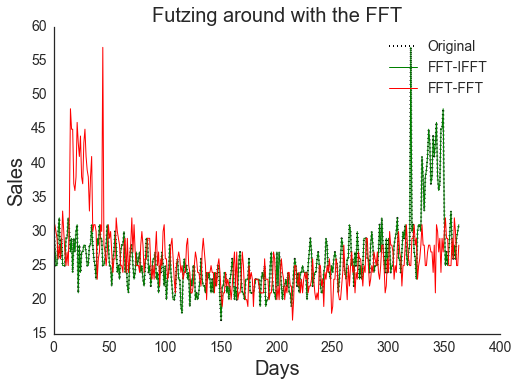

In [16]:
sales_fft_ifft = ifft(sales_fft)
sales_fft_ifft = np.abs(sales_fft_ifft) # There's sometimes a little numerical noise that gives tiny complex points
sales_fft_fft = fft(sales_fft) # If we didn't do the inverse...
sales_fft_fft = np.abs(sales_fft_fft)/(364)  # Needed to scale down
plt.figure()
plt.plot(days_array, sales_array, color='k', linestyle=':', linewidth=2, label='Original')
plt.plot(days_array, sales_fft_ifft, color='g', linewidth=1, label="FFT-IFFT")
plt.plot(days_array, sales_fft_fft, color='r', linewidth=1, label="FFT-FFT")
plt.xlabel('Days', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.tick_params(labelsize=14)
plt.title('Futzing around with the FFT', fontsize=20)
plt.legend(fontsize=14)
sns.despine()

### [Welch's Method](https://en.wikipedia.org/wiki/Welch%27s_method)

A related algorithm to know about is Welch's Method. I won't go into how it works, but the basic idea is that this gives you the power-spectral-density (basically the amplitude squared) only. It cleans out noise, but you lose some resolution ($T$ becomes the input parameter ``nperseg`` in the scipy implementation).

In [17]:
from scipy.signal import welch
welch_freq, welch_P = welch(sales_array, fs=1.0, nperseg=256, scaling='spectrum')
#fs is sample freq, 1/day. scaling=spectrum is recommended here
print(1/welch_freq[:4])

[     inf  256.     128.      85.333]


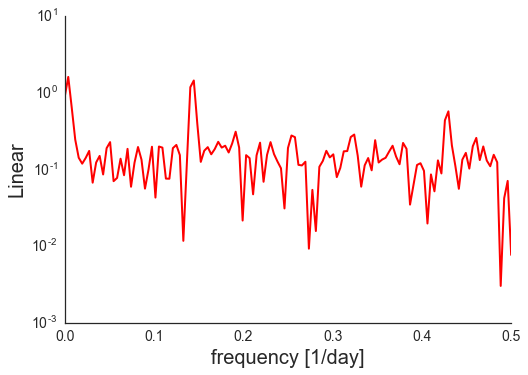

In [18]:
plt.figure()
plt.semilogy(welch_freq, np.sqrt(welch_P), color='r', linewidth=2)
plt.xlabel('frequency [1/day]', fontsize=20)
plt.ylabel('Linear', fontsize=20)
plt.tick_params(labelsize=14)
sns.despine()

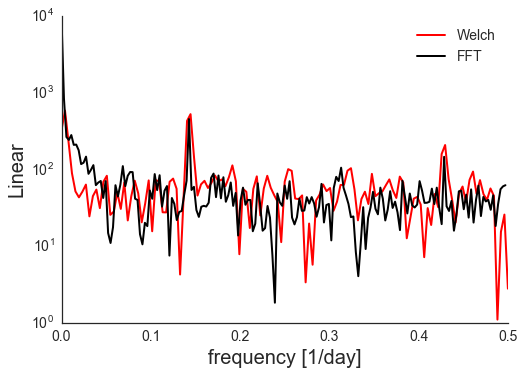

In [19]:
plt.figure()
plt.semilogy(welch_freq, 364*np.sqrt(welch_P), color='r', linewidth=2, label='Welch')
plt.semilogy(freqs[:lenval/2], np.abs(sales_fft)[:lenval/2], linewidth=2, color='k', label='FFT')
plt.xlabel('frequency [1/day]', fontsize=20)
plt.ylabel('Linear', fontsize=20)
plt.tick_params(labelsize=14)
plt.legend(fontsize=14)
sns.despine()

In [20]:
print(np.sum(sales_array**2))
print(np.sum(np.abs(sales_fft)**2))

255795.0
93109380.0


In [21]:
np.sum(np.abs(sales_fft)**2)/np.sum(sales_array**2)

364.00000000000006